## <center> Home Assignment 3 </center>

<center>Zhengxuan Yan</center>
<center>zy2053@nyu.edu</center>


In [1]:
import matplotlib.pyplot as plt

from main import main
from technical_strategies import (
    TechnicalStrategy, 
    BuyHoldStrategy
)


INIT_INVESTMENT = 20000

#### Trading  Initialization   
The self-designed back testing framework has several assumptions:
1. Initial investment was `20k` dollars  
2. Commission was `two-sided`, either buy (pay more) or sell (get less), and ratio was `0.00025`   
4. Volume of each market order was `100 shares` and could be executed immediately  
5. Data was of daily frequency and was extracted directly from `yahoo finance`: `yfinance` api when running the code  
6. Ticker I chose was Tesla: `TSLA`
7. The back-testing period was from `2010-06-30` to `2022-09-20`, which was the max I could extract from the api
8. Technical strategy I used was `MACD`: `Gold Cross` = long signal whereas `Death Cross` = short signal    
9. If there was a buy and hold but no death cross signal triggered until the end (no sell), we would close our position at the end of the back-testing period  
10. There was no consecutive buy or selling orders, aka. a buy order should always be followed by a sell order. Besides, a round-trip should always be buy-sell trip since I assumed no financing (short) selling was only allowed when there were position in hand 

#### Instructions  
Codes consists of several modules  
1. `technical_strategies.py`: This includes the design of classes for Buy-and-Hold Strategies, Technical Strategies (MACD) etc.  
2. `back_testing.py`: This includes the design of class for the BackTester.  
3. `main.py`: This includes a main function which integrates strategy initialization, running and back testing.  
4. `utils.py`: This includes some utilities for the calculation of performance indicators
5. `log_trace.log`: This a log file which records info for all orders (time, price, size, buy/sell etc.). 

#### MACD Strategy

In [2]:
df_macd, matrix_macd, idx_macd = main(
    investment=INIT_INVESTMENT,
    symbol="TSLA",
    log_path=None,
    strategy=TechnicalStrategy
)  # , sr_macd
df_macd.set_index("Date", inplace=True)

In [3]:
df_macd.head()

,Open,High,Low,Close,Volume,ema_12,ema_26,macd_line,signal_line
Date,,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,1.592667,1.592667,0.000000,0.000000
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,1.590500,1.590590,-0.000090,-0.000050
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,1.541127,1.545107,-0.003980,-0.001661
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,1.458700,1.470995,-0.012295,-0.005263
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,1.354178,1.378930,-0.024752,-0.011061


Signal trigger mechnism of MACD

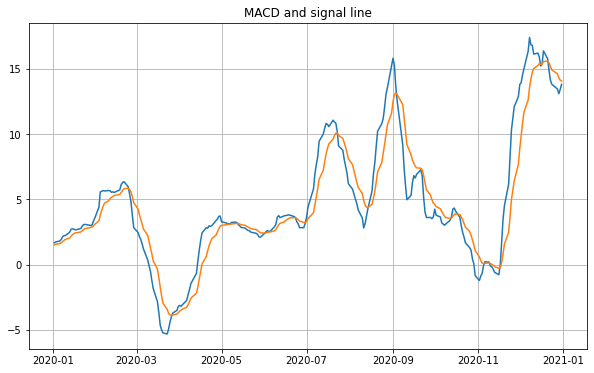

In [4]:
plt.figure(figsize=(10, 6))

plt.title("MACD and signal line")
plt.plot(df_macd.loc["2020", "macd_line"], label="MACD")
plt.plot(df_macd.loc["2020", "signal_line"], label="signal")

plt.grid()
plt.show()

In [5]:
matrix_macd.tail()

,signal,position,close_price,cash,holdings,total,pnl,cum_return
2022-09-13,hold,100,292.130005,11131.740363,29213.000488,40344.740852,20344.740852,1.017237
2022-09-14,hold,100,302.609985,11131.740363,30260.998535,41392.738899,21392.738899,1.069637
2022-09-15,hold,100,303.750000,11131.740363,30375.000000,41506.740363,21506.740363,1.075337
2022-09-16,hold,100,303.350006,11131.740363,30335.000610,41466.740974,21466.740974,1.073337
2022-09-19,sell,0,309.070007,42031.014346,0.000000,42031.014346,22031.014346,1.101551


Performance of MACD Strategy on TSLA

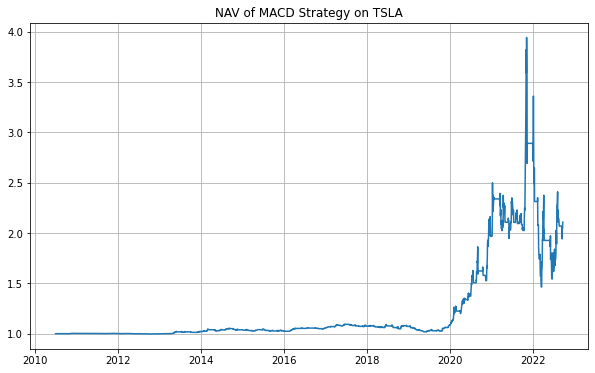

In [6]:
plt.figure(figsize=(10, 6))

plt.title("NAV of MACD Strategy on TSLA")
plt.plot((1 + matrix_macd["pnl"].diff() / INIT_INVESTMENT).cumprod(), label="MACD")

plt.grid()
plt.show()

In [7]:
idx_macd

,annualized_return,annualized_volatility,total_return,annual_sharpe_ratio,maximum_drawdown,number_round_trip,z_score,p_value
0,0.090215,0.241771,1.101551,0.373141,-0.883167,123,0.368672,0.356186


From the results above including nav plot, we can conclude that the performance of MACD strategy performs well with an annual return at around 10%. The total return doubled at the end of the back testing period. With the highest nav nearly 4 times the initial investment. But the volatility is also very high: nearly 24% with the 88% max drawdown (almost in the year 2022)  
There were only 123 round trip which means there are only 246 orders in total (sample size). This can to some extent explain why the p-value of back-testing return is not significant or robust. 

#### Buy and Hold Strategy

In [8]:
df_bh, matrix_bh, idx_bh = main(
    investment=INIT_INVESTMENT,
    symbol="TSLA",
    log_path=None,
    strategy=BuyHoldStrategy
)

In [9]:
matrix_bh.tail()

,signal,position,close_price,cash,holdings,total,pnl,cum_return
2022-09-13,hold,100,292.130005,19840.693485,29213.000488,49053.693973,29053.693973,1.452685
2022-09-14,hold,100,302.609985,19840.693485,30260.998535,50101.692020,30101.692020,1.505085
2022-09-15,hold,100,303.750000,19840.693485,30375.000000,50215.693485,30215.693485,1.510785
2022-09-16,hold,100,303.350006,19840.693485,30335.000610,50175.694095,30175.694095,1.508785
2022-09-19,sell,0,309.070007,50739.967467,0.000000,50739.967467,30739.967467,1.536998


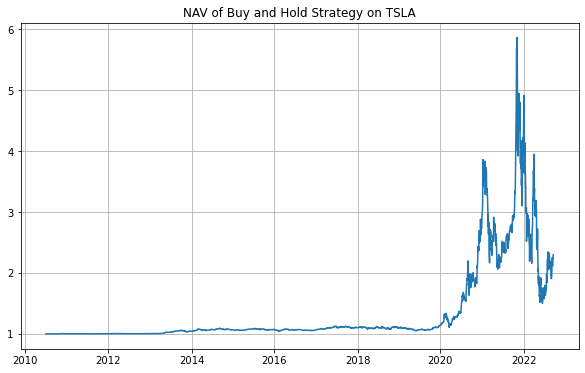

In [10]:
plt.figure(figsize=(10, 6))

plt.title("NAV of Buy and Hold Strategy on TSLA")
plt.plot((1 + matrix_bh["pnl"].diff() / INIT_INVESTMENT).cumprod(), label="Buy and Hold")

plt.grid()
plt.show()

In [11]:
idx_bh

,annualized_return,annualized_volatility,total_return,annual_sharpe_ratio,maximum_drawdown,number_round_trip,z_score,p_value
0,0.125877,0.338708,1.536998,0.371639,-1.002917,1,0.033108,0.486794


Since the MACD strategy shows a strong momentum, in order to check it out, I used Buy and Hold Strategy instead.  
The performance is stunning, with a total return of 153%, annual return of 12%.  
But there is also a lot of problems, the volatility is at a very high level, with annualized volatility at 33% and a 100% maximum draw down which means you may lose all of your money when you enter the market at some specific time.  
Besides, the p-value also tells us that this buy and hold strategy makes no sense but just gambling, (very small sample size / not enough trades).  
Though the performance using MACD is not as good as Buy and Hold, it can lower the volatility and add more robustness to the investment.  